In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS


%matplotlib inline

In [21]:
from nltk.tag.stanford import StanfordNERTagger
from nltk.tokenize import word_tokenize


# Import FE DataFrame

In [9]:
www_fe = pd.read_csv('www_fe.csv', encoding='latin1')

In [10]:
www_fe.head(1)

,Date,Page Title,Age,Gender,Source / Medium,Pageviews,Unique Pageviews,Page,Title,Source,Medium,unique_percent,page_wc,page_number,source_facebook,source_google,source_yahoo,source_instagram,source_pinterest,major_sources
0,2019-06-06,Chrissy Teigen Wore the Pleated-Jean Trend | W...,35-44,female,m.facebook.com / referral,35541,31670,Chrissy Teigen Wore the Pleated-Jean Trend,Who What Wear,m.facebook.com,referral,0.891084,6,0,1,0,0,0,0,Facebook


In [12]:
www_nlp = www_fe[['Page Title', 'Pageviews', 'Unique Pageviews']].groupby(['Page Title']).sum().reset_index()

# Feature engineering for www_nlp

In [15]:
www_nlp['unique_percent'] = www_nlp['Unique Pageviews'] / www_nlp['Pageviews']

#split 'Page Title' column into two
page_split = www_nlp['Page Title'].str.split('|', expand = True)
www_nlp['Page'] = page_split[0]
www_nlp['Title'] = page_split[1]
for i in range(len(www_nlp['Title'])):
    if "Who What Wear UK" in www_nlp['Title'][i]:
        www_nlp['Title'][i] = 'Who What Wear UK'
    elif "Who What Wear" in www_nlp['Title'][i]:
        www_nlp['Title'][i] = 'Who What Wear'
    else:
        pass

C:\Users\Brianna Lytle\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Brianna Lytle\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [16]:
www_nlp.head()

,Page Title,Pageviews,Unique Pageviews,unique_percent,Page,Title
0,'80s Fashion Trends: 35 Iconic Looks From the ...,50,47,0.940000,'80s Fashion Trends: 35 Iconic Looks From the ...,Who What Wear UK
1,"10 ""Boring"" Basics Every Woman Needs From Amaz...",6349,5149,0.810994,"10 ""Boring"" Basics Every Woman Needs From Amazon",Who What Wear
2,"10 ""Boring"" Fashion Basics French Girls Always...",2214,1665,0.752033,"10 ""Boring"" Fashion Basics French Girls Always...",Who What Wear
3,10 Affordable Jewelry Brands We Always Shop | ...,9606,7743,0.806059,10 Affordable Jewelry Brands We Always Shop,Who What Wear
4,10 Affordable Stores Like Lulu's | Who What Wear,9546,7222,0.756547,10 Affordable Stores Like Lulu's,Who What Wear


# NLP

create dataframe only with one age group.

CREATE CUSTOM STOP WORDS LIST

DIVIDE BY 6???

In [17]:
X = www_nlp['Page']
# custom_stop = list(ENGLISH_STOP_WORDS)

In [18]:
def ngramwords(vecttype, list_ngram, titlelist, list_colors):
    fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (20,13))
    plt.subplots_adjust(hspace = 0.6)
    
    ax = ax.ravel()
    for i, vectorizer in enumerate(vecttype):
        vec = vectorizer(ngram_range = list_ngram[i])
        words_df = pd.DataFrame(vec.fit_transform(X).todense(), columns = vec.get_feature_names())
        top_5 = words_df.sum().sort_values(ascending = True).tail(7)
        top_5.plot.bar(ax = ax[i], color = list_colors[i])
        plt.setp(ax[i].get_xticklabels(), ha = "right", rotation = 45)
        
    for i, title in enumerate(titlelist):
        ax[i].set_title(title)

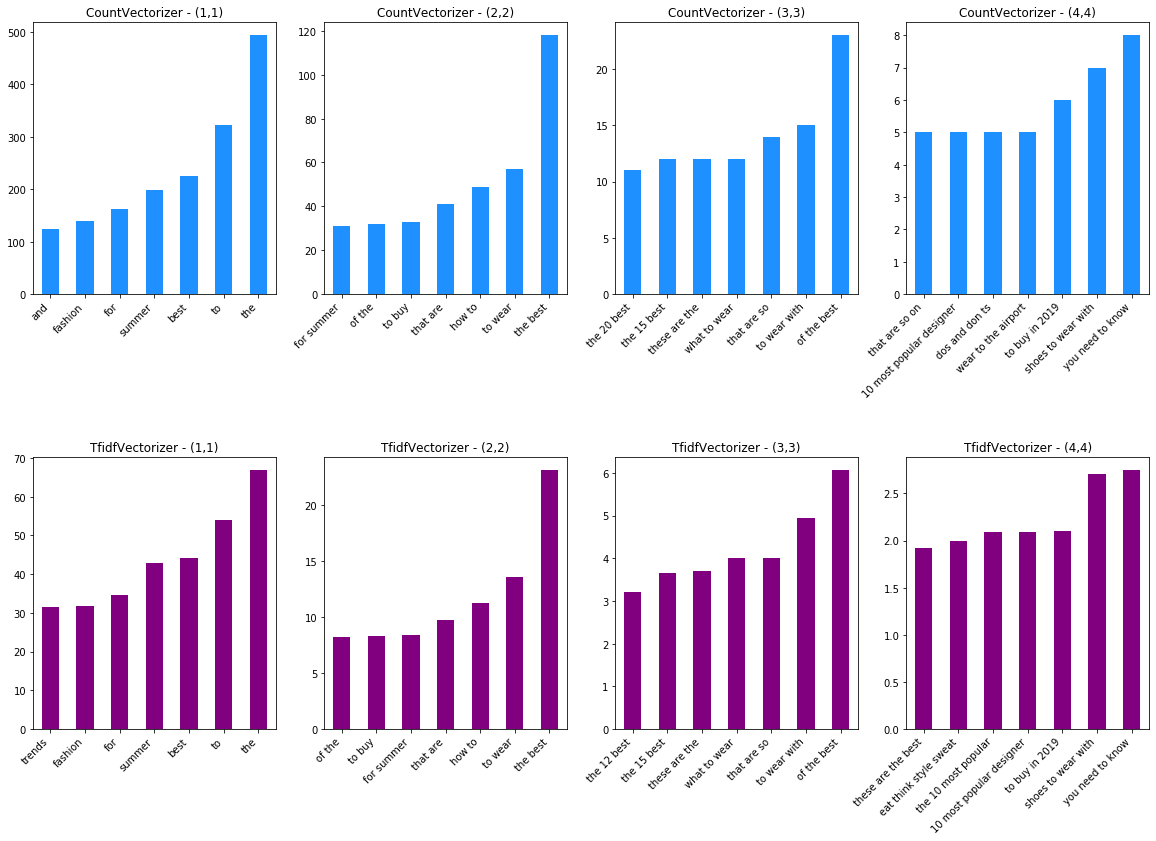

In [19]:
ngramwords([CountVectorizer, CountVectorizer, CountVectorizer, CountVectorizer, TfidfVectorizer, TfidfVectorizer, TfidfVectorizer, TfidfVectorizer],
          [(1,1), (2,2), (3,3), (4,4), (1,1), (2,2), (3,3), (4,4)],
          ['CountVectorizer - (1,1)', 'CountVectorizer - (2,2)', 'CountVectorizer - (3,3)', 'CountVectorizer - (4,4)',
          'TfidfVectorizer - (1,1)', 'TfidfVectorizer - (2,2)', 'TfidfVectorizer - (3,3)', 'TfidfVectorizer - (4,4)'],
          ['dodgerblue', 'dodgerblue', 'dodgerblue', 'dodgerblue', 'purple', 'purple', 'purple', 'purple'])

- Most common single terms (with stop words)
- most common bigrams (no stop words)